In [1]:
# Import required packages
import os
import glob
import pandas as pd
import numpy as np
import geopandas as gp
from shapely.geometry import Point
import seaborn as sns
import matplotlib.pyplot as plt
#%% set up directory 
# do what you have to do to get into 'data-raw' 
# os.chdir('data-raw')

ModuleNotFoundError: No module named 'seaborn'

In [8]:
#aeg
wd = os.getcwd()
os.chdir(os.path.join('..','data'))
#os.chdir("D:/data/cog/COG/data-raw/")
#os.chdir("D:/data/cog/COG/data-raw/")
#print('current working directory:',os.getcwd())

In [9]:
os.getcwd()

'C:\\WU\\COG\\data'

In [10]:
df_ff = pd.read_csv('ff_tx_nm_withstats.csv')
#df.shape
df_ff.head(2)

C:\Users\galanter\AppData\Local\Temp\3\ipykernel_21764\3861772851.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ff = pd.read_csv('ff_tx_nm_withstats.csv')


,Unnamed: 0,pKey,JobStartDate,APINumber,CountyNumber,OperatorName,WellName,Latitude,Longitude,Projection,...,FederalWell,IndianWell,Source,DTMOD,COUNTY_x,COUNTY_y,State,job_end_date,VolSum,VolMean
0,0,2172b9e8-9545-437a-b882-4ed87595cd85,6/27/2011 12:00:00 AM,30015396480000,15,"EOG Resources, Inc.",Elk Wallow 11 State #09H,32.138414,-103.95001,NAD27,...,False,False,NaN,NaN,NaN,Eddy,New Mexico,2011-06-27,5442192.0,5442192.0
1,1,97b837d1-54cc-485b-beca-3d085f25d803,7/11/2011 12:00:00 AM,30025352430000,25,Devon Energy Production Company L. P.,Outland State Unit 3,32.489350,-103.43392,NAD27,...,False,False,NaN,NaN,NaN,Lea,New Mexico,2011-07-11,399378.0,399378.0


In [11]:
df_ff.Projection.unique()

array(['NAD27', 'WGS84', 'NAD83', 'Nad27'], dtype=object)

In [10]:
df_ff = df_ff.replace(['Nad27'],'NAD27')
df_ff.Projection.unique()

array(['NAD27', 'WGS84', 'NAD83'], dtype=object)

In [11]:
#Query for Nad27
df_NAD27 = df_ff[df_ff['Projection'] == "NAD27"].copy()
df_NAD27.Projection.unique()

array(['NAD27'], dtype=object)

In [12]:
#Query for WGS84
df_WGS84 = df_ff[df_ff['Projection'] == "WGS84"].copy()
df_WGS84.Projection.unique()

array(['WGS84'], dtype=object)

In [13]:
#Query for NAD83
df_NAD83 = df_ff[df_ff['Projection'] == "NAD83"].copy()
#df_NAD83.count()

In [14]:
# Convert dataframes to geodataframe
# Set Geometry
#EPSG:4267 NAD27
#EPSG:4269 NAD83
#EPSG:4326 WGS84 
geometry = df_NAD27[["Latitude", "Longitude"]].apply(lambda coord: Point(coord["Longitude"], coord["Latitude"]), axis=1)
# Set Coordinate Reference System
crs = "EPSG:4267"
df_geo27 = gp.GeoDataFrame(df_NAD27, geometry=geometry, crs=crs)
df_geo27.head(5)


,Unnamed: 0,pKey,JobStartDate,APINumber,CountyNumber,OperatorName,WellName,Latitude,Longitude,Projection,...,IndianWell,Source,DTMOD,COUNTY_x,COUNTY_y,State,job_end_date,VolSum,VolMean,geometry
0,0,2172b9e8-9545-437a-b882-4ed87595cd85,6/27/2011 12:00:00 AM,30015396480000,15,"EOG Resources, Inc.",Elk Wallow 11 State #09H,32.138414,-103.95001,NAD27,...,False,NaN,NaN,NaN,Eddy,New Mexico,2011-06-27,5442192.0,5442192.0,POINT (-103.95001 32.13841)
1,1,97b837d1-54cc-485b-beca-3d085f25d803,7/11/2011 12:00:00 AM,30025352430000,25,Devon Energy Production Company L. P.,Outland State Unit 3,32.489350,-103.43392,NAD27,...,False,NaN,NaN,NaN,Lea,New Mexico,2011-07-11,399378.0,399378.0,POINT (-103.43392 32.48935)
2,2,91380d65-b271-4678-b595-a1e31d5da5a1,12/27/2011 12:00:00 AM,30015390710000,15,Devon Energy Production Company L. P.,Snapping `2` State 4H,32.066670,-103.74289,NAD27,...,False,NaN,NaN,NaN,Eddy,New Mexico,2011-12-27,3245046.0,3245046.0,POINT (-103.74289 32.06667)
3,3,9be328cc-e1f4-4e11-ac05-e3c598bace89,12/28/2011 12:00:00 AM,30015390730000,15,Devon Energy Production Company L. P.,Snapping `2` State 5H,32.066370,-103.74317,NAD27,...,False,NaN,NaN,NaN,Eddy,New Mexico,2011-12-28,3201492.0,3201492.0,POINT (-103.74317 32.06637)
5,5,a7f52a88-965d-40d8-ad2a-ce77b2d46725,1/16/2012 12:00:00 AM,30015393930000,15,Devon Energy Production Company L. P.,Rigel `20` Federal Com 1H,32.651790,-103.89844,NAD27,...,False,NaN,NaN,NaN,Eddy,New Mexico,2012-01-16,961124.0,961124.0,POINT (-103.89844 32.65179)


In [15]:
# Convert dataframes to geodataframe
# Set Geometry
#EPSG:4269 NAD83
geometry = df_NAD83[["Latitude", "Longitude"]].apply(lambda coord: Point(coord["Longitude"], coord["Latitude"]), axis=1)
# Set Coordinate Reference System
crs = "EPSG:4269"
df_geo83 = gp.GeoDataFrame(df_NAD83, geometry=geometry, crs=crs)
df_geo83.head(5)

,Unnamed: 0,pKey,JobStartDate,APINumber,CountyNumber,OperatorName,WellName,Latitude,Longitude,Projection,...,IndianWell,Source,DTMOD,COUNTY_x,COUNTY_y,State,job_end_date,VolSum,VolMean,geometry
58,58,023fdac3-ee05-4aae-a064-1698b55f8e87,8/28/2012 12:00:00 AM,30015404230000,15,Devon Energy Production Company L. P.,Onyx PWU 29 #2H,32.373180,-104.615375,NAD83,...,False,NaN,NaN,NaN,Eddy,New Mexico,2012-08-28,1274490.0,1274490.0,POINT (-104.61538 32.37318)
77,77,29c13829-7cf0-466f-b662-968deb2104c7,10/9/2012 12:00:00 AM,30015397850000,15,SM Energy,Osage Federal 34-3H,32.615088,-104.070244,NAD83,...,False,NaN,NaN,NaN,Eddy,New Mexico,2012-10-09,1305547.0,1305547.0,POINT (-104.07024 32.61509)
83,83,cf958df3-acfe-4991-ab07-c6471314d3ba,10/16/2012 12:00:00 AM,30015262390000,15,Range Resources Corporation,Teledyne 1,32.311120,-104.059980,NAD83,...,False,NaN,NaN,NaN,Eddy,New Mexico,2012-10-16,100044.0,100044.0,POINT (-104.05998 32.31112)
97,97,ddb74e6f-e592-43f5-82b4-ca556547361d,10/30/2012 12:00:00 AM,30025400250000,25,Cimarex Energy Co. of Colorado,JG 16 State #13,32.830105,-103.772521,NAD83,...,False,NaN,NaN,NaN,Lea,New Mexico,2012-10-30,2850890.0,2850890.0,POINT (-103.77252 32.83011)
103,103,2cbfe37f-e8d1-47ea-964b-1c4257badf54,11/1/2012 12:00:00 AM,30025400260000,25,Cimarex Energy Co. of Colorado,JG 16 State #14,32.828366,-103.774667,NAD83,...,False,NaN,NaN,NaN,Lea,New Mexico,2012-11-01,3024408.0,3024408.0,POINT (-103.77467 32.82837)


In [16]:
# Convert dataframes to geodataframe
# Set Geometry
#EPSG:4326 WGS84 
geometry = df_WGS84[["Latitude", "Longitude"]].apply(lambda coord: Point(coord["Longitude"], coord["Latitude"]), axis=1)
# Set Coordinate Reference System
crs = "EPSG:4326"
df_geo84 = gp.GeoDataFrame(df_WGS84, geometry=geometry, crs=crs)
df_geo84.head(5)

,Unnamed: 0,pKey,JobStartDate,APINumber,CountyNumber,OperatorName,WellName,Latitude,Longitude,Projection,...,IndianWell,Source,DTMOD,COUNTY_x,COUNTY_y,State,job_end_date,VolSum,VolMean,geometry
4,4,e37a82e6-ad19-47a7-aa9a-17be6dcdaf46,1/3/2012 12:00:00 AM,30015274450000,15,SM Energy,PDU #303,32.620630,-104.045470,WGS84,...,False,NaN,NaN,NaN,Eddy,New Mexico,2012-01-03,26960.0,26960.0,POINT (-104.04547 32.62063)
52,52,f48e18e4-e0fd-4fd3-9e62-746a03afa024,8/9/2012 12:00:00 AM,30015402060000,15,Devon Energy Production Company L. P.,Coral PWU 28 1H,32.638014,-104.086593,WGS84,...,False,NaN,NaN,NaN,Eddy,New Mexico,2012-08-17,1110990.0,1110990.0,POINT (-104.08659 32.63801)
55,55,28de1c67-1d6f-4db0-84dd-14ad6cf36317,8/20/2012 12:00:00 AM,30015402070000,15,Devon Energy Production Company L. P.,Coral PWU 28 3H,32.625286,-104.076236,WGS84,...,False,NaN,NaN,NaN,Eddy,New Mexico,2012-08-21,1140039.0,1140039.0,POINT (-104.07624 32.62529)
1309,1309,4ef82d58-ef70-46e6-8d01-82d99b6d55b5,12/4/2014 12:00:00 AM,30015423180000,15,Devon Energy Production Company L. P.,Cotton Draw Unit 217H,32.152667,-103.761257,WGS84,...,False,NaN,NaN,NaN,Eddy,New Mexico,2014-12-13,5576423.0,2788211.5,POINT (-103.76126 32.15267)
1310,1310,d64379a4-db84-40e4-88d1-03c3c5a5edd5,12/4/2014 12:00:00 AM,30015423180000,15,Devon Energy Production Company L. P.,Cotton Draw Unit 217H,32.152667,-103.761257,WGS84,...,False,NaN,NaN,NaN,Eddy,New Mexico,2014-12-13,5576423.0,2788211.5,POINT (-103.76126 32.15267)


In [17]:
#check projection
df_geo27.crs


<Geographic 2D CRS: EPSG:4267>
Name: NAD27
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD27
- bounds: (167.65, 7.15, -47.74, 83.17)
Datum: North American Datum 1927
- Ellipsoid: Clarke 1866
- Prime Meridian: Greenwich

In [18]:
#check projection
df_geo83.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [19]:
#check projection
df_geo84.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [20]:
#Reproject geodataframes
#GeoDataFrame.to_crs(crs=None, epsg=None, inplace=False)
df_geo27to83 = df_geo27.to_crs(epsg=4269)
df_geo27to83.crs


<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [21]:
#Reproject geodataframes
#GeoDataFrame.to_crs(crs=None, epsg=None, inplace=False)
df_geo84to83 = df_geo84.to_crs(epsg=4269)
df_geo84to83.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [22]:
#Update to new projection in file
df_geo27to83a = df_geo27to83.replace(['NAD27'],'NAD83')
df_geo27to83a.Projection.unique()

array(['NAD83'], dtype=object)

In [23]:
#Update to new projection in file
df_geo84to83a = df_geo84to83.replace(['WGS84'],'NAD83')
df_geo84to83a.Projection.unique()

array(['NAD83'], dtype=object)

In [24]:
#append dataframes
df_geo83a = df_geo83.append(df_geo27to83)


In [25]:
#append dataframes
df_geo83b = df_geo83a.append(df_geo84to83)
df_geo83b.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [26]:
#df_geo83b.count()
df_geo83b.Projection.unique()

array(['NAD83', 'NAD27', 'WGS84'], dtype=object)

In [27]:
df_geo83b.head()

,Unnamed: 0,pKey,JobStartDate,APINumber,CountyNumber,OperatorName,WellName,Latitude,Longitude,Projection,...,IndianWell,Source,DTMOD,COUNTY_x,COUNTY_y,State,job_end_date,VolSum,VolMean,geometry
58,58,023fdac3-ee05-4aae-a064-1698b55f8e87,8/28/2012 12:00:00 AM,30015404230000,15,Devon Energy Production Company L. P.,Onyx PWU 29 #2H,32.373180,-104.615375,NAD83,...,False,NaN,NaN,NaN,Eddy,New Mexico,2012-08-28,1274490.0,1274490.0,POINT (-104.61538 32.37318)
77,77,29c13829-7cf0-466f-b662-968deb2104c7,10/9/2012 12:00:00 AM,30015397850000,15,SM Energy,Osage Federal 34-3H,32.615088,-104.070244,NAD83,...,False,NaN,NaN,NaN,Eddy,New Mexico,2012-10-09,1305547.0,1305547.0,POINT (-104.07024 32.61509)
83,83,cf958df3-acfe-4991-ab07-c6471314d3ba,10/16/2012 12:00:00 AM,30015262390000,15,Range Resources Corporation,Teledyne 1,32.311120,-104.059980,NAD83,...,False,NaN,NaN,NaN,Eddy,New Mexico,2012-10-16,100044.0,100044.0,POINT (-104.05998 32.31112)
97,97,ddb74e6f-e592-43f5-82b4-ca556547361d,10/30/2012 12:00:00 AM,30025400250000,25,Cimarex Energy Co. of Colorado,JG 16 State #13,32.830105,-103.772521,NAD83,...,False,NaN,NaN,NaN,Lea,New Mexico,2012-10-30,2850890.0,2850890.0,POINT (-103.77252 32.83011)
103,103,2cbfe37f-e8d1-47ea-964b-1c4257badf54,11/1/2012 12:00:00 AM,30025400260000,25,Cimarex Energy Co. of Colorado,JG 16 State #14,32.828366,-103.774667,NAD83,...,False,NaN,NaN,NaN,Lea,New Mexico,2012-11-01,3024408.0,3024408.0,POINT (-103.77467 32.82837)


In [28]:
#Read HUCs into datafram
HUCS = gp.read_file("WBD_HUC12_CONUS_pulled10262020.shp")


In [29]:
#Check projection of HUCS
HUCS.crs
#HUCS.head(2)

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [30]:
# Add HUC12 info data from HUC shapefile to FracFocus data
# Geopandas sjoin
df_geo83c = gp.sjoin(df_geo83b, HUCS, how='left', op='within')
df_geo83c.head(5)

,Unnamed: 0,pKey,JobStartDate,APINumber,CountyNumber,OperatorName,WellName,Latitude,Longitude,Projection,...,huc12,name,hutype,humod,tohuc,noncontrib,noncontr_1,shape_Leng,Shape_Le_1,Shape_Area
58,58,023fdac3-ee05-4aae-a064-1698b55f8e87,8/28/2012 12:00:00 AM,30015404230000,15,Devon Energy Production Company L. P.,Onyx PWU 29 #2H,32.373180,-104.615375,NAD83,...,130600110705,Outlet Dunnaway Draw,S,NM,130600110706,0.0,0.0,0.465813,0.465813,0.009301
77,77,29c13829-7cf0-466f-b662-968deb2104c7,10/9/2012 12:00:00 AM,30015397850000,15,SM Energy,Osage Federal 34-3H,32.615088,-104.070244,NAD83,...,130600110104,Burton Flat,S,NM,130600110307,0.0,0.0,0.498360,0.498360,0.006144
83,83,cf958df3-acfe-4991-ab07-c6471314d3ba,10/16/2012 12:00:00 AM,30015262390000,15,Range Resources Corporation,Teledyne 1,32.311120,-104.059980,NAD83,...,130600111204,Scoggin Flat-Pecos River,S,"GC,LE,UA",130600111401,0.0,0.0,0.695699,0.695699,0.012455
97,97,ddb74e6f-e592-43f5-82b4-ca556547361d,10/30/2012 12:00:00 AM,30025400250000,25,Cimarex Energy Co. of Colorado,JG 16 State #13,32.830105,-103.772521,NAD83,...,130600111501,130600111501,S,AD,130600111502,0.0,0.0,0.737496,0.737496,0.009322
103,103,2cbfe37f-e8d1-47ea-964b-1c4257badf54,11/1/2012 12:00:00 AM,30025400260000,25,Cimarex Energy Co. of Colorado,JG 16 State #14,32.828366,-103.774667,NAD83,...,130600111501,130600111501,S,AD,130600111502,0.0,0.0,0.737496,0.737496,0.009322


In [31]:
cnt = len(df_geo83c)
print (cnt)

49503


In [32]:
#Bring Permian basin bnd into dataframe to use for basemap, since hucs are whole country
BND = gp.read_file("PermianBasin_Extent_201712.shp")
BND.crs


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [33]:
#Reproject geodataframes
#GeoDataFrame.to_crs(crs=None, epsg=None, inplace=False)
BND2 = BND.to_crs(epsg=4269)
BND2.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [34]:
# Clip fracFocus with Hucs to Play BND using GeoPandas clip
# Do we want to add a buffer?
#For whole US likely want to make this a variable that we can enter play name and might want to loop through play
df_geo83d = gp.clip(df_geo83c, BND2)
df_geo83d.columns

Index(['Unnamed: 0', 'pKey', 'JobStartDate', 'APINumber', 'CountyNumber',
       'OperatorName', 'WellName', 'Latitude', 'Longitude', 'Projection',
       'TVD', 'TotalBaseWaterVolume', 'TotalBaseNonWaterVolume', 'StateName',
       'CountyName', 'FFVersion', 'FederalWell', 'IndianWell', 'Source',
       'DTMOD', 'COUNTY_x', 'COUNTY_y', 'State', 'job_end_date', 'VolSum',
       'VolMean', 'geometry', 'index_right', 'objectid', 'tnmid', 'metasource',
       'sourcedata', 'sourceorig', 'sourcefeat', 'loaddate', 'referenceg',
       'areaacres', 'areasqkm', 'states', 'huc12', 'name', 'hutype', 'humod',
       'tohuc', 'noncontrib', 'noncontr_1', 'shape_Leng', 'Shape_Le_1',
       'Shape_Area'],
      dtype='object')

In [35]:
#Add projected coordinates to file
df_geo83d["Xcoord"] = df_geo83d["geometry"].apply(lambda g: g.x)
df_geo83d["Ycoord"] = df_geo83d["geometry"].apply(lambda g: g.y)

In [36]:
cnt2 = len(df_geo83d)
cnt3 = (cnt2/cnt)* 100
cnt4 = round(100 - cnt3,2)
print (cnt4,'% of the records were removed')

1.14 % of the records were removed


In [37]:
geometry = df_geo83d[["Xcoord", "Ycoord"]].apply(lambda coord: Point(coord["Xcoord"], coord["Ycoord"]), axis=1)

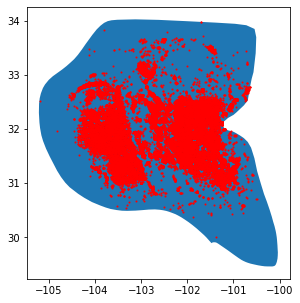

In [38]:
# Plot the bnd shapefile along with the FracFocus wells
from matplotlib import pyplot as plt
ax = BND2.plot(figsize=(15,5))
plt.scatter(df_geo83d["geometry"].x, df_geo83d["geometry"].y, color='r', s=1)


In [42]:
#Rename column in the merged dataset - two county attributes now one from HUCs
df_geo83e = df_geo83d.rename(columns={'COUNTY_y': 'COUNTY'})
df_geo83e.columns

Index(['Unnamed: 0', 'pKey', 'JobStartDate', 'APINumber', 'CountyNumber',
       'OperatorName', 'WellName', 'Latitude', 'Longitude', 'Projection',
       'TVD', 'TotalBaseWaterVolume', 'TotalBaseNonWaterVolume', 'StateName',
       'CountyName', 'FFVersion', 'FederalWell', 'IndianWell', 'Source',
       'DTMOD', 'COUNTY_x', 'COUNTY', 'State', 'job_end_date', 'VolSum',
       'VolMean', 'geometry', 'index_right', 'objectid', 'tnmid', 'metasource',
       'sourcedata', 'sourceorig', 'sourcefeat', 'loaddate', 'referenceg',
       'areaacres', 'areasqkm', 'states', 'huc12', 'name', 'hutype', 'humod',
       'tohuc', 'noncontrib', 'noncontr_1', 'shape_Leng', 'Shape_Le_1',
       'Shape_Area', 'Xcoord', 'Ycoord'],
      dtype='object')

In [44]:
#Query df_geo83d for a limited number of columns for final data
#naming convention fracfocus_short_MMDDYYY
#Once Amy's code is added before this code will also need to add 'job_begin_date' to short attributes list
fracfocus_short_05052022 = df_geo83e[['APINumber','State','COUNTY', 'Xcoord', 'Ycoord', 'job_end_date', 'TotalBaseWaterVolume', 'huc12']].copy()
#fracfocus_short_05052022.to_csv('fracfocus_short_05052022.csv', index=False)
fracfocus_short_05052022

,APINumber,State,COUNTY,Xcoord,Ycoord,job_end_date,TotalBaseWaterVolume,huc12
58,30015404230000,New Mexico,Eddy,-104.615375,32.373180,2012-08-28,1274490.0,130600110705
77,30015397850000,New Mexico,Eddy,-104.070244,32.615088,2012-10-09,1305547.0,130600110104
83,30015262390000,New Mexico,Eddy,-104.059980,32.311120,2012-10-16,100044.0,130600111204
97,30025400250000,New Mexico,Lea,-103.772521,32.830105,2012-10-30,2850890.0,130600111501
103,30025400260000,New Mexico,Lea,-103.774667,32.828366,2012-11-01,3024408.0,130600111501
...,...,...,...,...,...,...,...,...
48746,42501371540000,Texas,Yoakum,-103.025933,33.050967,2021-07-27,3974528.0,120800040305
48807,42501372920000,Texas,Yoakum,-102.940170,33.046539,2021-08-06,6055392.0,120800040306
48880,42501372400000,Texas,Yoakum,-102.954739,33.065805,2021-08-14,4431420.0,120800040503
48947,42501372960000,Texas,Yoakum,-102.951558,33.065621,2021-08-22,4274936.0,120800040503


In [41]:
#Export full dataset out as a csv
#naming convention fracfocus_long_MMDDYYY
#df_geo83e.to_csv('df_geo83e.csv', index=False)